#Koneksi ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#IMPORT MODULE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot
from sklearn import metrics
import matplotlib.pyplot as plt; plt.rcdefaults()

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from lightgbm import LGBMClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , confusion_matrix,f1_score, roc_auc_score,precision_score, recall_score,roc_curve

from datetime import date

MENAMPILKAN DATA DAN PENYESUAIAN SEBELUM MERGE

In [3]:
patien_info = pd.read_csv('drive/MyDrive/dataset/PatientInfo.csv')

## Data Patien Info

In [4]:
print(patien_info.shape)
patien_info.head()

(5165, 13)


,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50.0,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,released
1,1000000002,male,30.0,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,released
2,1000000003,male,50.0,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,released
3,1000000004,male,20.0,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,released
4,1000000005,female,20.0,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,released


In [5]:
patien_info.rename(columns= {'confirmed_date' :'date'}, inplace=True) #mengubah nama column confirmed_date menjadi date
patien_info.age = patien_info.age.fillna(0) #mengubah bagian kosong pada kolom age menjadi 0
patien_info.age= patien_info.age.astype('int64') #mengubah tipe data kolom age
print(patien_info.shape)
patien_info.head()#menampilkan data patien_info

(5165, 13)


,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,date,released_date,deceased_date,state
0,1000000001,male,50,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,released
1,1000000002,male,30,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,released
2,1000000003,male,50,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,released
3,1000000004,male,20,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,released
4,1000000005,female,20,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,released


# DATA PREPARASI

## Missing Value

In [6]:
pip install plotly_express==0.4.0

In [7]:
def null_analysis(patien_info):
  null_cnt = patien_info.isnull().sum() # calculate null counts
  null_cnt = null_cnt[null_cnt!=0] # remove non-null cols
  null_percent = null_cnt / len(patien_info) * 100 # calculate null percentages
  null_table = pd.concat([pd.DataFrame(null_cnt), pd.DataFrame(null_percent)], axis=1)
  null_table.columns = ['counts', 'percentage']
  null_table.sort_values('counts', ascending=False, inplace=True)
  return null_table

# visualise null table
import plotly_express as px
null_table = null_analysis(patien_info)
px.bar(null_table.reset_index(), x='index', y='percentage', text='counts', height=500)

In [8]:
patien_info.drop(['deceased_date','released_date'], inplace=True, axis=1)
patien_info

,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,date,state
0,1000000001,male,50,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,released
1,1000000002,male,30,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,released
2,1000000003,male,50,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,released
3,1000000004,male,20,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,released
4,1000000005,female,20,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,released
...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,5/30/2020,released
5161,7000000016,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,6/16/2020,released
5162,7000000017,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,6/18/2020,isolated
5163,7000000018,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,6/18/2020,isolated


## Distribusi Label

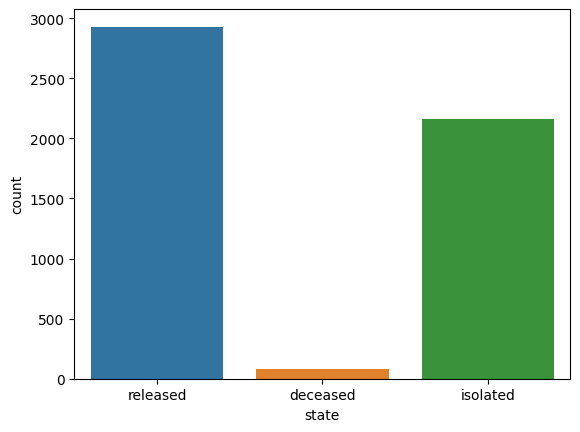

In [9]:
sns.countplot(x='state', data=patien_info);pyplot.show()

## REPLACE MISSING VALUE

In [10]:
patien_info.describe()

,patient_id,age
count,5.165000e+03,5165.000000
mean,2.863635e+09,29.581801
std,2.074211e+09,24.860169
min,1.000000e+09,0.000000
25%,1.000001e+09,0.000000
50%,2.000000e+09,30.000000
75%,6.001000e+09,50.000000
max,7.000000e+09,100.000000


In [11]:
patien_info.min()

patient_id    1000000001
age                    0
province           Busan
state           deceased
dtype: object

In [12]:
patien_info['symptom_onset_date'] = patien_info['symptom_onset_date'].replace(np.nan, '1/1/2020')

In [13]:
patien_info

,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,date,state
0,1000000001,male,50,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,released
1,1000000002,male,30,Seoul,Jungnang-gu,overseas inflow,NaN,31,1/1/2020,1/30/2020,released
2,1000000003,male,50,Seoul,Jongno-gu,contact with patient,2002000001,17,1/1/2020,1/30/2020,released
3,1000000004,male,20,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,released
4,1000000005,female,20,Seoul,Seongbuk-gu,contact with patient,1000000002,2,1/1/2020,1/31/2020,released
...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30,Jeju-do,Jeju-do,overseas inflow,NaN,25,1/1/2020,5/30/2020,released
5161,7000000016,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,1/1/2020,6/16/2020,released
5162,7000000017,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,72,1/1/2020,6/18/2020,isolated
5163,7000000018,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,1/1/2020,6/18/2020,isolated


In [14]:
patien_info['sex'].replace({'male' : 0}, inplace=True)
patien_info['sex'].replace({'female' : 1}, inplace=True)
patien_info['sex'] = patien_info['sex'].replace(np.nan, -1)
patien_info['infection_case'] = patien_info['infection_case'].replace(np.nan, 2)
patien_info['infected_by'] = patien_info['infected_by'].replace(np.nan, -1)
patien_info['contact_number'] = patien_info['contact_number'].replace(np.nan, -1)
patien_info['symptom_onset_date'] = pd.to_datetime(patien_info.date, format='%m/%d/%Y')
patien_info['date'] = pd.to_datetime(patien_info.date, format='%m/%d/%Y')
for col_name in patien_info.columns:
    if(patien_info[col_name].dtype == 'object'):
        patien_info[col_name]= patien_info[col_name].astype('category')
        patien_info[col_name] = patien_info[col_name].cat.codes
patien_info

,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,date,state
0,1000000001,0.0,50,15,39,51,0,80,2020-01-23,2020-01-23,2
1,1000000002,0.0,30,15,93,51,0,43,2020-01-30,2020-01-30,2
2,1000000003,0.0,50,15,91,47,475,23,2020-01-30,2020-01-30,2
3,1000000004,0.0,20,15,95,51,0,87,2020-01-30,2020-01-30,2
4,1000000005,1.0,20,15,124,47,1,28,2020-01-31,2020-01-31,2
...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,1.0,30,11,86,51,0,34,2020-05-30,2020-05-30,2
5161,7000000016,-1.0,0,11,86,51,0,0,2020-06-16,2020-06-16,2
5162,7000000017,-1.0,0,11,86,51,0,78,2020-06-18,2020-06-18,1
5163,7000000018,-1.0,0,11,86,51,0,0,2020-06-18,2020-06-18,1


## Fiture Engineering

In [15]:
patien_info['days']  = patien_info.date - patien_info.symptom_onset_date
patien_info.drop(['symptom_onset_date','date'], inplace=True, axis=1)

patien_info

,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,state,days
0,1000000001,0.0,50,15,39,51,0,80,2,0 days
1,1000000002,0.0,30,15,93,51,0,43,2,0 days
2,1000000003,0.0,50,15,91,47,475,23,2,0 days
3,1000000004,0.0,20,15,95,51,0,87,2,0 days
4,1000000005,1.0,20,15,124,47,1,28,2,0 days
...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,1.0,30,11,86,51,0,34,2,0 days
5161,7000000016,-1.0,0,11,86,51,0,0,2,0 days
5162,7000000017,-1.0,0,11,86,51,0,78,1,0 days
5163,7000000018,-1.0,0,11,86,51,0,0,1,0 days


In [16]:
patien_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   patient_id      5165 non-null   int64          
 1   sex             5165 non-null   float64        
 2   age             5165 non-null   int64          
 3   province        5165 non-null   int8           
 4   city            5165 non-null   int16          
 5   infection_case  5165 non-null   int8           
 6   infected_by     5165 non-null   int16          
 7   contact_number  5165 non-null   int8           
 8   state           5165 non-null   int8           
 9   days            5162 non-null   timedelta64[ns]
dtypes: float64(1), int16(2), int64(2), int8(4), timedelta64[ns](1)
memory usage: 201.9 KB


In [17]:
patien_info.columns

Index(['patient_id', 'sex', 'age', 'province', 'city', 'infection_case',
       'infected_by', 'contact_number', 'state', 'days'],
      dtype='object')

In [18]:
patien_info = patien_info [['sex', 'age', 'province', 'city', 'infection_case',
       'infected_by', 'contact_number',  'days','state']]
patien_info.head()

,sex,age,province,city,infection_case,infected_by,contact_number,days,state
0,0.0,50,15,39,51,0,80,0 days,2
1,0.0,30,15,93,51,0,43,0 days,2
2,0.0,50,15,91,47,475,23,0 days,2
3,0.0,20,15,95,51,0,87,0 days,2
4,1.0,20,15,124,47,1,28,0 days,2


In [19]:
patien_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   sex             5165 non-null   float64        
 1   age             5165 non-null   int64          
 2   province        5165 non-null   int8           
 3   city            5165 non-null   int16          
 4   infection_case  5165 non-null   int8           
 5   infected_by     5165 non-null   int16          
 6   contact_number  5165 non-null   int8           
 7   days            5162 non-null   timedelta64[ns]
 8   state           5165 non-null   int8           
dtypes: float64(1), int16(2), int64(1), int8(4), timedelta64[ns](1)
memory usage: 161.5 KB


## Label Endcoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# patien_info['sex']=le.fit_transform(patien_info['sex'])
# patien_info['age']=le.fit_transform(patien_info['age'])
# patien_info['city']=le.fit_transform(patien_info['city'])
# patien_info['infection_case']=le.fit_transform(patien_info['infection_case'])
# patien_info['infected_by']=le.fit_transform(patien_info['infected_by'])
# patien_info['contact_number']=le.fit_transform(patien_info['contact_number'])
patien_info['days']=le.fit_transform(patien_info['days'])
# patien_info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Fiture Correlation

Text(0.5, 1.0, 'Feature Correlation')

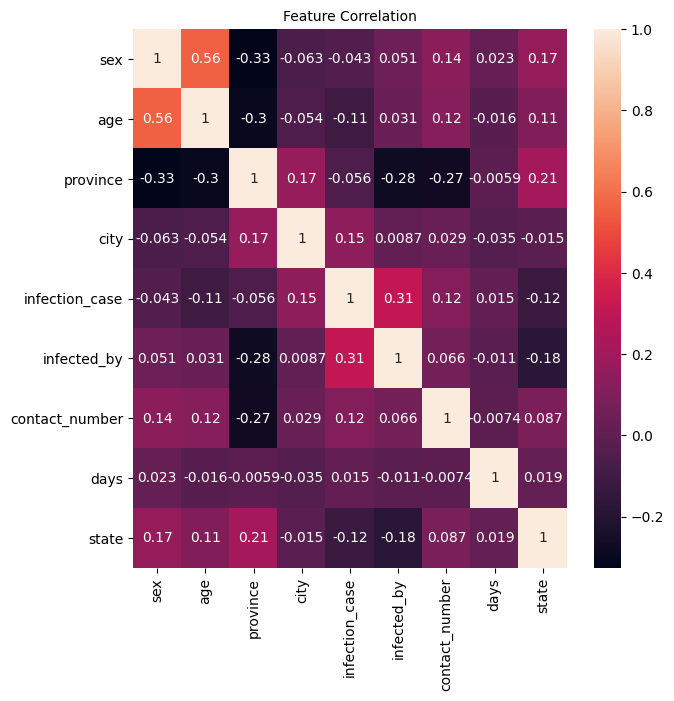

In [21]:
pyplot.figure(figsize=(7,7))
corr=patien_info.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
pyplot.title('Feature Correlation', y = 1.0, size=10)

In [22]:
patien_info.columns

Index(['sex', 'age', 'province', 'city', 'infection_case', 'infected_by',
       'contact_number', 'days', 'state'],
      dtype='object')

In [23]:
fiture_cols = ['sex', 'age', 'province', 'city', 'infection_case', 'infected_by',
       'contact_number', 'days']
X = patien_info[fiture_cols]
Y = patien_info.state

## Cross Validation

In [24]:
test_size = 0.2
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Model

# Decision Tree

              precision    recall  f1-score   support

           0       0.31      0.50      0.38        10
           1       0.86      0.89      0.87       435
           2       0.91      0.88      0.90       588

    accuracy                           0.88      1033
   macro avg       0.69      0.76      0.72      1033
weighted avg       0.88      0.88      0.88      1033

[[  5   1   4]
 [  2 387  46]
 [  9  62 517]]
Accuracy Decision Tree: 86.25111392523802
ROC AUC score dt: 89.90219725938245
Recall of dt is:  87.99612778315586
Precision of dt is: 88.4194722311857
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


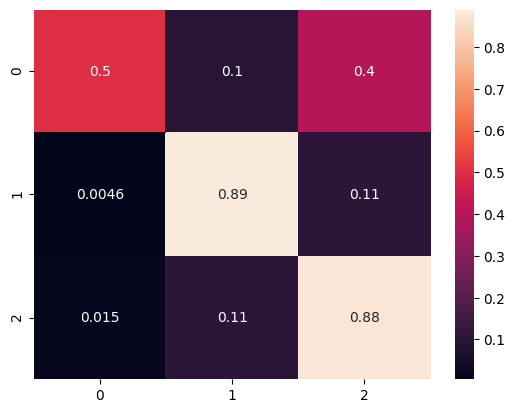

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predicted = dt.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_dt = cross_val_score(dt, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Accuracy Decision Tree: {}".format((akurasi_dt.mean()))) 
auc_dt = roc_auc_score(Y_test, dt.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score dt:', auc_dt)

recall_dt=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of dt is: ",recall_dt)
prec_dt=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of dt is:",prec_dt)

print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Naive Bayes

              precision    recall  f1-score   support

           0       0.07      0.80      0.13        10
           1       0.47      0.91      0.62       435
           2       0.80      0.10      0.17       588

    accuracy                           0.45      1033
   macro avg       0.45      0.60      0.31      1033
weighted avg       0.65      0.45      0.36      1033

[[  8   2   0]
 [ 23 398  14]
 [ 80 452  56]]
Akurasi Naive Bayes: 30.496224379719525
ROC AUC score Naive Bayes: 84.07524594776322
Recall of Naive Bayes is:  44.72410454985479
Precision of Naive Bayes is: 65.27831036523072
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


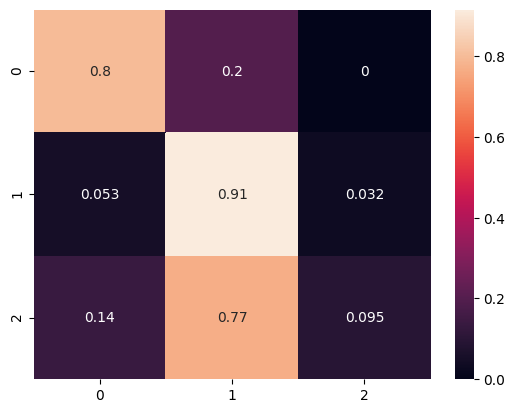

In [26]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predicted = nb.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_nb = cross_val_score(nb, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Akurasi Naive Bayes: {}".format((akurasi_nb.mean()))) 
auc_nb = roc_auc_score(Y_test, nb.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score Naive Bayes:', auc_nb)
recall_nb=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of Naive Bayes is: ",recall_nb)
prec_nb=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of Naive Bayes is:",prec_nb)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.68      0.54      0.60       435
           2       0.70      0.81      0.75       588

    accuracy                           0.69      1033
   macro avg       0.61      0.62      0.61      1033
weighted avg       0.69      0.69      0.68      1033

[[  5   1   4]
 [  4 235 196]
 [  2 112 474]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Akurasi Logistic Regresion: 69.21767271703953
ROC AUC score Logistic Regresion: 80.79881759092795
Recall of Logistic Regresion is:  69.1190706679574
Precision of Logistic Regresion is: 68.90752588376404
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


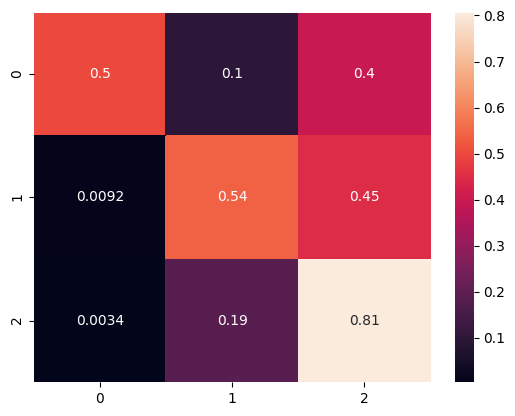

In [27]:
log = LogisticRegression()
log.fit(X_train, Y_train)
predicted = log.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_log = cross_val_score(log, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Akurasi Logistic Regresion: {}".format((akurasi_log.mean()))) 
auc_log = roc_auc_score(Y_test, log.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score Logistic Regresion:', auc_log)
recall_log=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of Logistic Regresion is: ",recall_log)
prec_log=precision_score(Y_test,predicted, average='weighted') *100
print("Precision of Logistic Regresion is:",prec_log)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Random Forest

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.89      0.90      0.89       435
           2       0.92      0.91      0.92       588

    accuracy                           0.90      1033
   macro avg       0.75      0.77      0.76      1033
weighted avg       0.90      0.90      0.90      1033

[[  5   1   4]
 [  1 390  44]
 [  5  46 537]]
Akurasi Random Forest: 89.05914356737489
ROC AUC score Random Forest: 95.00168779332009
Recall of Random Forest is:  90.22265246853823
Precision of Random Forest is: 90.27244953282953
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


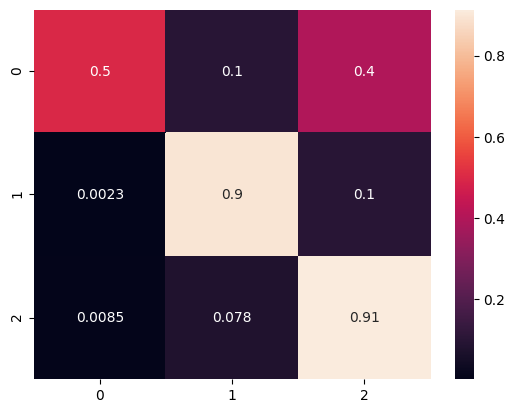

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predicted = rf.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_rf = cross_val_score(rf, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Akurasi Random Forest: {}".format((akurasi_rf.mean()))) 
auc_rf = roc_auc_score(Y_test, rf.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score Random Forest:', auc_rf)
recall_rf=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of Random Forest is: ",recall_rf)
prec_rf=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of Random Forest is:",prec_rf)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))


# KNN

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.82      0.79      0.80       435
           2       0.84      0.88      0.86       588

    accuracy                           0.83      1033
   macro avg       0.89      0.65      0.71      1033
weighted avg       0.83      0.83      0.83      1033

[[  3   3   4]
 [  0 343  92]
 [  0  73 515]]

Akurasi KNN: 72.80005628253835
ROC AUC score KNN: 90.32364969721907
Recall of KNN is:  83.34946757018393
Precision of KNN is: 83.41835430617746
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


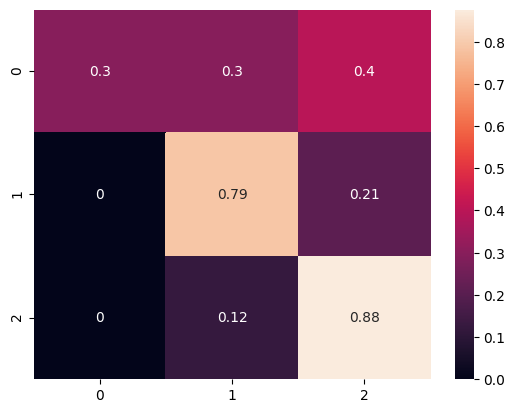

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_knn = cross_val_score(knn, X_test, Y_test, cv=seed, scoring=scoring) *100
print("\nAkurasi KNN: {}".format((akurasi_knn.mean()))) 
auc_knn = roc_auc_score(Y_test, knn.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score KNN:', auc_knn)
recall_knn=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of KNN is: ",recall_knn)
prec_knn=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of KNN is:",prec_knn)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Light Gradient Boost

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.89      0.90      0.90       435
           2       0.92      0.91      0.92       588

    accuracy                           0.90      1033
   macro avg       0.74      0.77      0.76      1033
weighted avg       0.91      0.90      0.90      1033

[[  5   1   4]
 [  2 391  42]
 [  5  45 538]]
Accuracy Light Gradient Boosting: 89.06055063083345
ROC AUC score LGBM: 96.3590054474906
Recall of LGBM is:  90.4162633107454
Precision of LGBM is: 90.51908271919704
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


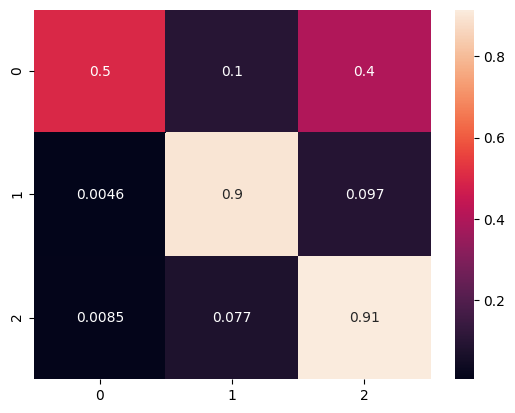

In [30]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)
predicted = lgbm.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_lgbm = cross_val_score(lgbm, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Accuracy Light Gradient Boosting: {}".format((akurasi_lgbm.mean()))) 
auc_lgbm = roc_auc_score(Y_test, lgbm.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score LGBM:', auc_lgbm)

recall_lgbm=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of LGBM is: ",recall_lgbm)
prec_lgbm=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of LGBM is:",prec_lgbm)

print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

In [31]:
lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# HASIL AKURASI

In [32]:
algos=["Decision Tree","Naive Bayes","Logistic Regression","Random Forest","KNN","Light Gradient Boost"]
acc=[akurasi_dt.mean(), akurasi_nb.mean(), akurasi_log.mean(),akurasi_rf.mean(),akurasi_knn.mean(),akurasi_lgbm.mean()]
auc=[auc_dt, auc_nb, auc_log,  auc_rf, auc_knn, auc_lgbm]
recall=[recall_dt, recall_nb, recall_log,  recall_rf, recall_knn, recall_lgbm]
prec=[prec_dt, prec_nb, prec_log,  prec_rf, prec_knn, prec_lgbm]

comp={"Algorithms":algos,"Accuracies":acc,"AUC":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","AUC","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,AUC,Recall,Precision
5,Light Gradient Boost,89.060551,96.359005,90.416263,90.519083
3,Random Forest,89.059144,95.001688,90.222652,90.272450
0,Decision Tree,86.251114,89.902197,87.996128,88.419472
4,KNN,72.800056,90.323650,83.349468,83.418354
2,Logistic Regression,69.217673,80.798818,69.119071,68.907526
1,Naive Bayes,30.496224,84.075246,44.724105,65.278310


#Hyperparameter Tunning LGBM

In [33]:
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV

optimized_lgbm = lgbm.LGBMRegressor()                                                            
optimized_lgbm.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
param = {
        'n_estimators': (100, 400, 10),
        'min_child_weight': (3, 20, 2),
        'colsample_bytree': (0.4, 1.0),
        'max_depth': (5, 15, 2),
        'min_child_samples': (10, 30)}
        
grid = GridSearchCV(optimized_lgbm, param_grid = param, cv=5)

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': (0.4, 1.0),
                         'max_depth': (5, 15, 2), 'min_child_samples': (10, 30),
                         'min_child_weight

In [35]:
predicted1 = grid.predict(X_test)
predicted1
X_test.shape

(1033, 8)

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.89      0.90      0.90       435
           2       0.92      0.91      0.92       588

    accuracy                           0.90      1033
   macro avg       0.74      0.77      0.76      1033
weighted avg       0.91      0.90      0.90      1033

[[  5   1   4]
 [  2 391  42]
 [  5  45 538]]
Accuracy Light Gradient Boosting after tuning: 89.06055063083345
ROC AUC score LGBM: 96.22143378424167
Recall of LGBM is after tuning:  90.4162633107454
Precision of LGBM is after tuning: 90.51908271919704
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


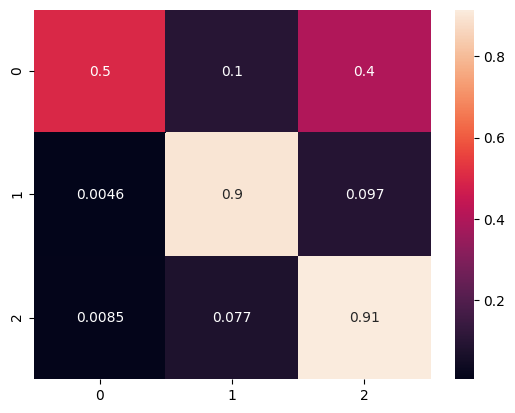

In [36]:
lgbm_tuning = LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0)
lgbm_tuning.fit(X_train, Y_train)
predicted = lgbm_tuning.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

akurasi_lgbm = cross_val_score(lgbm_tuning, X_test, Y_test, cv=seed, scoring='accuracy') *100

from sklearn.metrics import roc_auc_score

print("Accuracy Light Gradient Boosting after tuning: {}".format((akurasi_lgbm.mean()))) 
auc_lgbm = roc_auc_score(Y_test, lgbm_tuning.predict_proba(X_test), multi_class='ovo') *100
print('ROC AUC score LGBM:', auc_lgbm)

recall_lgbm=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of LGBM is after tuning: ",recall_lgbm)
prec_lgbm=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of LGBM is after tuning:",prec_lgbm)

print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

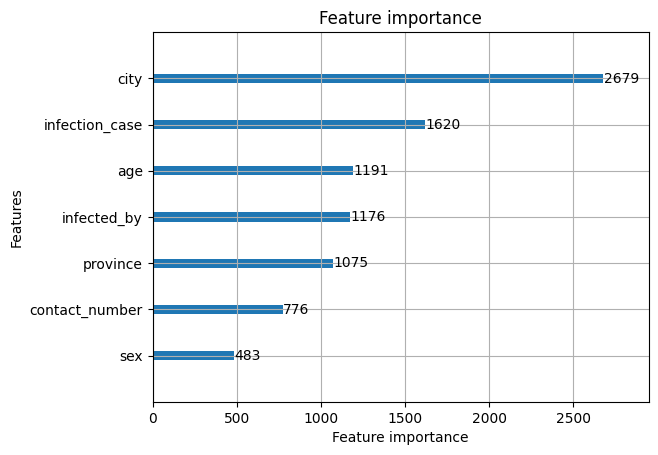

In [37]:
from lightgbm import plot_importance
plot_importance(lgbm_tuning)
pyplot.show()